## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [28]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_full.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_filterbanks.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_augmented.csv')
tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_stft.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_zcr.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_mfcc.csv')

In [29]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,119,120,121,122,123,124,125,126,127,128
0,../../../Source/Clean_train_clips/Augmented/Sh...,1,0.066539,0.245301,0.570619,0.709732,0.515574,0.474137,0.457788,0.406188,...,0.050108,0.045316,0.039242,0.040674,0.042355,0.044229,0.043567,0.044781,0.041608,0.039233
1,../../../Source/Clean_train_clips/Augmented/Sh...,1,0.056946,0.237869,0.562482,0.706151,0.509842,0.468646,0.456405,0.410667,...,0.012851,0.010118,0.007201,0.005275,0.003863,0.002144,0.001126,0.000618,0.000441,0.000369
2,../../../Source/Clean_train_clips/Augmented/Sh...,1,0.042708,0.168259,0.381253,0.470721,0.368581,0.332476,0.336276,0.294199,...,0.009606,0.007416,0.005384,0.004179,0.003166,0.001821,0.001057,0.000671,0.000613,0.000448
3,../../../Source/Clean_train_clips/Augmented/Sh...,1,0.065679,0.179341,0.462861,0.728688,0.670334,0.522022,0.505615,0.483837,...,0.048841,0.047344,0.045361,0.042836,0.042391,0.041635,0.043667,0.042613,0.040975,0.036413
4,../../../Source/Clean_train_clips/Augmented/Sh...,1,0.038908,0.170410,0.456994,0.721788,0.660263,0.514714,0.499646,0.477929,...,0.012698,0.009737,0.007083,0.004830,0.003412,0.002039,0.001192,0.000728,0.000532,0.000458


## Models

### Split the data / Load the data

In [30]:
data = tap_df.iloc[:,2:].values
labels = tap_df['Labels']

In [31]:
#data
#labels


In [32]:
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=11, stratify=labels)

In [33]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [36]:
X_train = data
y_train = labels

In [37]:
X_test = pd.read_csv('../../../Source/Data/X_test_audio_stft.csv')
y_test = pd.read_csv('../../../Source/Data/y_test_audio_stft.csv')

In [38]:
X_test.head()

,Path,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,128
0,../../../Source/Clean_train_clips/Shuffle/8/37...,0.047180,0.245008,0.694178,0.893952,0.819122,0.785288,0.643753,0.693353,0.759358,...,0.010916,0.008283,0.006137,0.004417,0.002523,0.001370,0.000798,0.000352,0.000139,0.000077
1,../../../Source/Clean_train_clips/Shuffle/7/6.wav,0.062114,0.199805,0.538015,0.750717,0.812538,1.021205,0.736497,0.502587,0.481868,...,0.008939,0.007922,0.005708,0.003707,0.003132,0.002572,0.001294,0.000592,0.000388,0.000319
2,../../../Source/Clean_train_clips/Shuffle/8/38...,0.044512,0.201921,0.634069,0.856390,0.821640,0.768087,0.562943,0.529474,0.508204,...,0.010707,0.009701,0.007923,0.005438,0.003326,0.001927,0.001038,0.000457,0.000231,0.000158
3,../../../Source/Clean_train_clips/Shuffle/4/19...,0.093683,0.408133,1.271174,1.961549,1.866245,1.584912,1.381904,1.211375,1.150679,...,0.009172,0.007405,0.005781,0.004557,0.003158,0.001493,0.000708,0.000350,0.000159,0.000072
4,../../../Source/Clean_train_clips/Ball_change/...,0.086544,0.507030,1.553715,2.038969,1.364636,0.942815,0.770843,0.670368,0.679529,...,0.016621,0.015563,0.011834,0.007393,0.004879,0.002704,0.001304,0.000575,0.000229,0.000092


In [39]:
X_test = X_test.iloc[:,1:].values
y_test = y_test['Labels']

## Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [42]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [43]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
4,0,1,0.234328
5,0,1,0.286693
8,1,0,0.512778
14,0,1,0.156989
15,0,1,0.494807
23,0,1,0.250517
24,0,1,0.474416
26,0,1,0.454439
27,0,1,0.166453
39,0,1,0.116602


In [44]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.7739130434782608


### Visualizing results

In [45]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

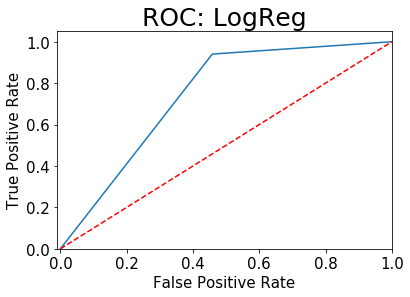

ROC_AUC_Score: 0.7409825870646767


In [46]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [47]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [49]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [50]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
5,0,1,0.286693,1,0.325557
15,0,1,0.494807,1,0.195475
25,0,0,0.772974,1,0.225419
31,0,0,0.604875,1,0.263365
44,1,0,0.748625,0,0.789799
47,0,0,0.616115,1,0.256133
48,0,0,0.908910,1,0.426405
50,0,1,0.088845,1,0.355302
53,1,0,0.543937,0,0.560113
59,0,0,0.972249,1,0.469947


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [51]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.8347826086956521


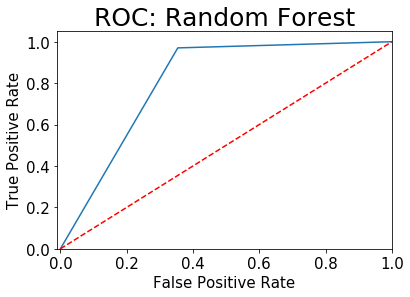

ROC_AUC_Score: 0.8079912935323382


In [52]:
ROC_plot('Random Forest', y_test, predict_rf)

In [53]:
results.to_csv('../../../Source/Data/results_sklearn_augmented_stft.csv', index = False)